# Introdução a Séries Temporais



Uma série temporal é definida como um conjunto de valores que se modificam em intervalos iguais de tempo.

Exemplo de séries temporais:
* Valor de ativos na bolsa de valores
* População de um país
* Demanda por um determinado produto

Os modelos utilizados para descrever séries temporais são processos estocásticos, isto é, processos controlados por leis probabilísticas. 

Temos na literatura um número muito grande de modelos diferentes para descrever o comportamento de uma série particular. A construção destes modelos depende de vários fatores, tais como o comportamento do fenômeno ou o conhecimento apriori que temos de sua natureza e do objetivo da análise. O pacote ```pandas``` possui um conjunto de funcinalidades que auxiliam na análise de séries temporais.

In [1227]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados/Export_Data.csv')
df.head()

,time,http_get_count,http_post_count,http_get_avg_ms,http_get_max_ms,http_post_avg_ms,http_post_max_ms,system_cpu_percent,process_cpu_percent,total_memory_used_mib,total_memory_committed_mib
0,2022-05-12 07:29:30,0.0667,397.0,40.5,49.4,17.0,769.0,66.7,15.8,221.0,394.0
1,2022-05-12 07:29:45,0.0667,391.0,45.3,49.4,17.2,769.0,66.8,16.0,312.0,394.0
2,2022-05-12 07:30:00,0.0667,386.0,37.6,49.4,17.4,769.0,67.4,15.6,222.0,394.0
3,2022-05-12 07:30:15,0.0667,375.0,29.3,49.4,18.1,74.7,68.9,16.7,260.0,394.0
4,2022-05-12 07:30:30,0.0667,362.0,26.1,49.4,19.0,74.7,70.5,15.8,263.0,394.0


# Trabalhando com Datas

O primeiro passo para a análise de séries temporais é conversão da coluna que contém a data para o tipo especial _datetime_. Por tanto, utilizaremos a função _pd.to_datetime(df.month)_.

In [1228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        241 non-null    object 
 1   http_get_count              232 non-null    float64
 2   http_post_count             232 non-null    float64
 3   http_get_avg_ms             232 non-null    float64
 4   http_get_max_ms             231 non-null    float64
 5   http_post_avg_ms            232 non-null    float64
 6   http_post_max_ms            231 non-null    float64
 7   system_cpu_percent          231 non-null    float64
 8   process_cpu_percent         231 non-null    float64
 9   total_memory_used_mib       231 non-null    float64
 10  total_memory_committed_mib  231 non-null    float64
dtypes: float64(10), object(1)
memory usage: 20.8+ KB


In [1229]:
df.time = pd.to_datetime(df.time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        241 non-null    datetime64[ns]
 1   http_get_count              232 non-null    float64       
 2   http_post_count             232 non-null    float64       
 3   http_get_avg_ms             232 non-null    float64       
 4   http_get_max_ms             231 non-null    float64       
 5   http_post_avg_ms            232 non-null    float64       
 6   http_post_max_ms            231 non-null    float64       
 7   system_cpu_percent          231 non-null    float64       
 8   process_cpu_percent         231 non-null    float64       
 9   total_memory_used_mib       231 non-null    float64       
 10  total_memory_committed_mib  231 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 20.8 KB


Em seguida, transformaremos a coluna que contém a data como a coluna indexadora dos demais utilizando o comando _DataFrame.set_index()_

In [1230]:
df.set_index('time', inplace=True)

Resultado da criação de um novo index do tipo _DatetimeIndex_

In [1231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2022-05-12 07:29:30 to 2022-05-12 08:29:30
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   http_get_count              232 non-null    float64
 1   http_post_count             232 non-null    float64
 2   http_get_avg_ms             232 non-null    float64
 3   http_get_max_ms             231 non-null    float64
 4   http_post_avg_ms            232 non-null    float64
 5   http_post_max_ms            231 non-null    float64
 6   system_cpu_percent          231 non-null    float64
 7   process_cpu_percent         231 non-null    float64
 8   total_memory_used_mib       231 non-null    float64
 9   total_memory_committed_mib  231 non-null    float64
dtypes: float64(10)
memory usage: 20.7 KB


# Plotando as Series

Inicialmente faremos a plotagem de todos _trendding topics_. Para plotar todos os dados utilizando em um único gráfico utilizamos o comando _DataFrame.plot()_. Para modificar o tamnaho do gráfico, passamos o parâmetro ```_figsize=(15 , 6)```, aumentando a largura e altura do gráfico para 15 e 6, repectivamente. 

<AxesSubplot:xlabel='time'>

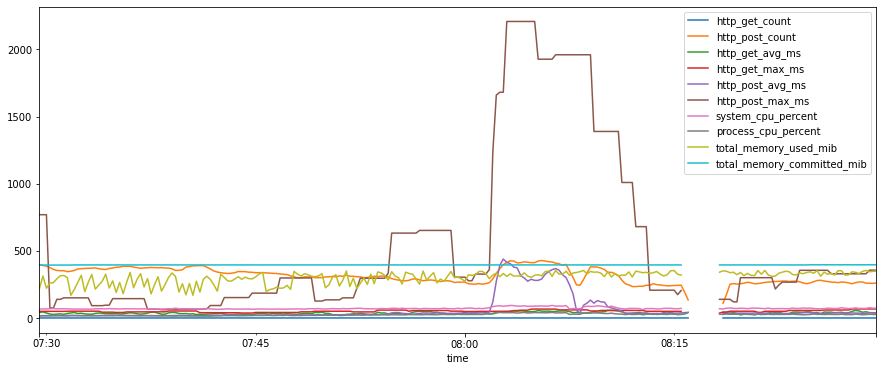

In [1232]:
df.plot(figsize=(15,6))

# Analisando Tendencia


Faremos a análise somente de uma métrica. Por conta da ocilação das pesquisas, pode ficar dificil confirmar qualquer tipo de tendência na frequência de pesquisas. Essas ocilações podem ser provocadas pela sazonalidade das pesquisas ou pela variabilidade natural da mesma.

<AxesSubplot:xlabel='time'>

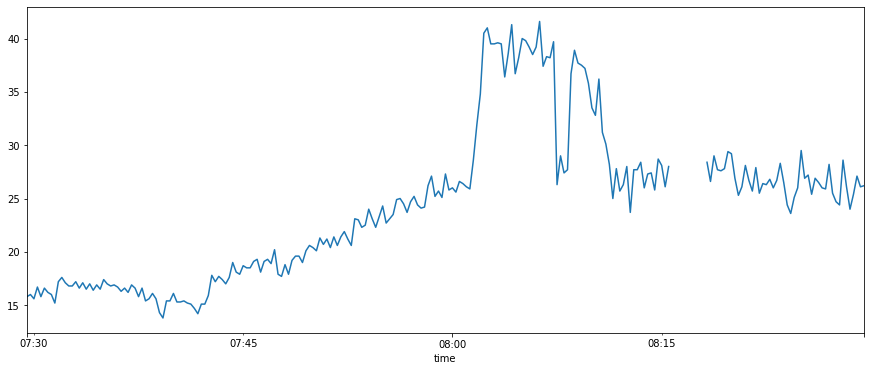

In [1233]:
df.process_cpu_percent.plot(figsize=(15, 6))

# Medias Moveis (MMS)

Uma das técnicas comuns para eliminação do ruído é a aplicação das médias móveis(em inglês rollign averages).

Considerando a série temporal $Z_1, Z_2, \ldots, Z_n$.
A técnica da média móvel consiste em calcular a média aritmética das $k$ observações mais recentes, ou seja

$$M_t = \frac{Z_t, Z_{t-1}, \ldots, Z_{t-k+1}}{k}$$

Detonamos por $k$ como sendo o comprimento da média.

Para plotar as médias móveis para o número de período que desejamos, utilizaremos o comando ```Series.rolling(numero_de_periodos).mean().plot()```

<AxesSubplot:xlabel='time'>

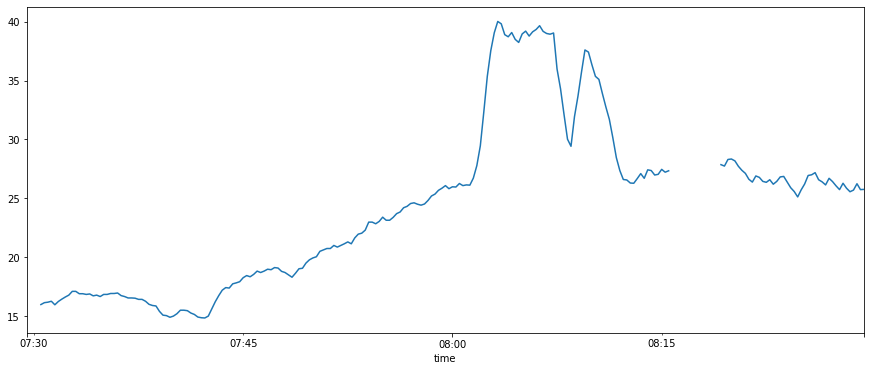

In [1234]:
df.process_cpu_percent.rolling(5).mean().plot(figsize=(15, 6 ))


# Analisando Sazonalidade

Para analisar a sazonalidade das pesquisas, precisaremos eliminar a tendência. Para tanto utilizaremos o conceito de Diferença Sucessivas.




### Diferenças Sucessivas 

O procedimento utilizado para eliminar a tendência é conhecido na literatura como procedimento para transformação de uma série não estacionária em uma série estacionária. 

A transformação mais comum consiste em tomar diferenças sucessivas da série originalm até se obter uma série estacionária. A primeira diferença $Z(t)$ é definida por

$$\Delta Z(t) = Z(t) - Z(t-1)$$

então a segunda diferença é,

$$\Delta^2 Z(t)=\Delta[\Delta Z(t)]=\Delta[Z(t) - Z(t - 1)]$$
$$\Delta^2 Z(t)=Z(t) - 2 Z(t - 1) + Z(t -2)$$

De modo geral, a n-ésima diferença de $Z(t)$ é

$$\Delta^n Z(t) = \Delta[\Delta^{n - 1}Z(t)]$$

Normalmente, será necessária somente uma ou duas diferenças para que a série se torne estacionária.


Para plotar as _n_ diferenças, utilizamos o comando 
```Series.diff(numero_de_periodos)```

<AxesSubplot:xlabel='time'>

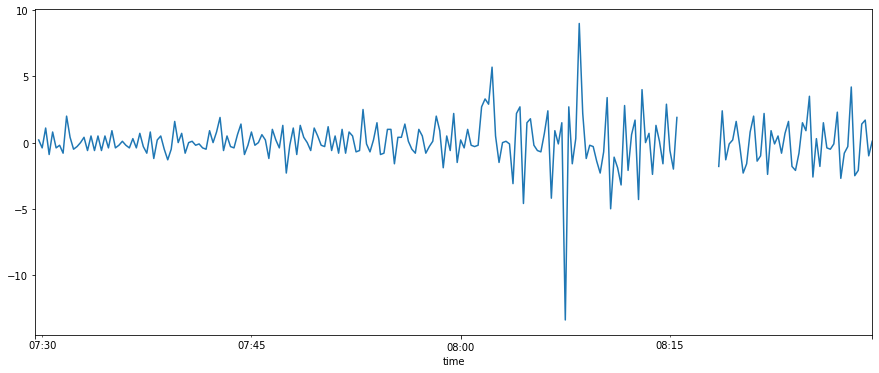

In [1235]:
df.process_cpu_percent.diff().plot(figsize=(15, 6))

<AxesSubplot:xlabel='time'>

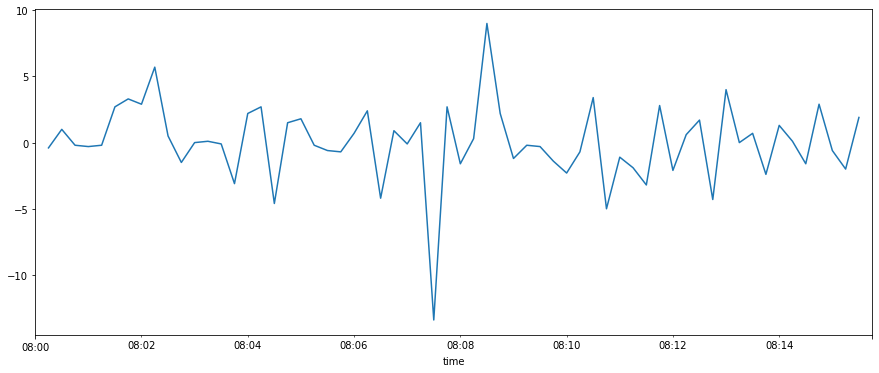

In [1236]:
filtro = (df.index.minute >= 0) & (df.index.minute <= 15)
df[filtro].process_cpu_percent.diff().plot(figsize=(15,6))

# Métodos Preditivos




Previsões de séries temporaris é um tópico com muitas aplicações possíveis, tais como previsão de preço de ativos, previsão do tempo, planejamento de negócios, alocação de recursos e muitos outros.

Um séries temporais é usualmente modelada sob um processo estocástico $Y(t)$, i.e., uma sequência de variáveis aleatórias. Em uma previsão, estamos no momento $t$ e temos interesse de estimar $Y(t+1)$, usando somente as informações disponíveis até o momento $t$.

# Modelo Naive

O modelo Naive é o exemplo mais básico e "inocente" de preditor para uma série temporal. A idéia do modelo é a de que o valor previsto para o período atual ```t``` seja igual a volor do período ```t-1```. Utilizaremos o Modelo Naive para iniciar nosso modelo de predição.

In [1237]:
df = pd.read_csv('dados/Export_Data.csv', usecols=['process_cpu_percent', 'time'])
df.time = pd.to_datetime(df.time)
df.set_index('time', inplace=True)
df.head()

,process_cpu_percent
time,
2022-05-12 07:29:30,15.8
2022-05-12 07:29:45,16.0
2022-05-12 07:30:00,15.6
2022-05-12 07:30:15,16.7
2022-05-12 07:30:30,15.8


In [1238]:
df['naive'] = df.process_cpu_percent.shift(1)
df.dropna(axis=0, inplace=True)
df.head()

,process_cpu_percent,naive
time,,
2022-05-12 07:29:45,16.0,15.8
2022-05-12 07:30:00,15.6,16.0
2022-05-12 07:30:15,16.7,15.6
2022-05-12 07:30:30,15.8,16.7
2022-05-12 07:30:45,16.6,15.8


<AxesSubplot:xlabel='time'>

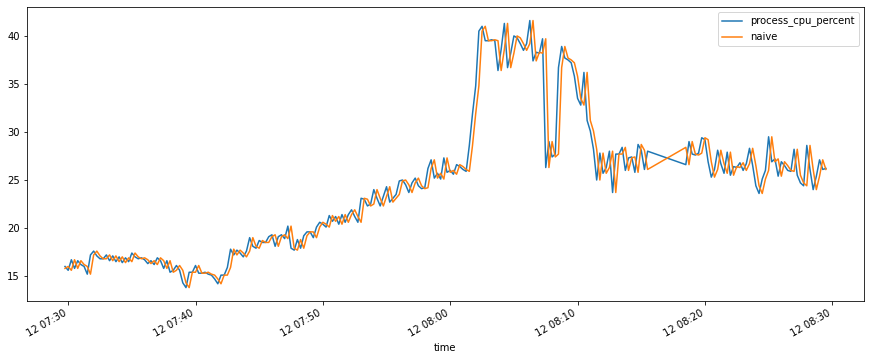

In [1239]:
df.plot(figsize=(15,6))

### Validação 

Faremos a validação do modelo _Naive_ calculando o erro médio quadrático entre a previsões e os valores observados. Para tanto, faremos o cálculo da diferença entre a coluna Real e a de Previsão e guardaremos em uma variável chamada _erros_. 

Para calcular a média do erro, utilizamos o comando 
_Series.mean()_

In [1240]:
erros = (df.process_cpu_percent - df.naive) ** 2
erros.mean()

3.3631441048034945

O modelo _Naive_ é utilizado como referência para modelos mais sofisticados. A idéia é que o modelos de previsão possuam erro médio quadrático menor que o modelo _Naive_. Caso contrário, temos um modelo extremamente ineficaz.

### Modelo Auto Regressivo

Em modelos de regressão múltipla, fazemos a previsão da variável de interesse utilizando a combinação linear das variáveis preditoras. Em um modelo autoregressivo, fazemos a previsão da variável de interesse utilizando a combinação linear dos valores passados da mesma variável. O termo autoregressivo indica que o processo é definido como um modelo de regressão de uma variável por ela mesma. 

Assim, um modelo autoregressivo de ordem &p& pode ser escrito como 

$$y_t = c + \beta_1y_{t-1} + \beta_2y_{t-2} + \cdots + \beta_p y_{t - p} + \epsilon_t$$

onde $\epsilon_t$ é o ruído branco. Nos referimos a um modelo AR($p$) como um modelo autoregressivo de ordem $p$.

In [1241]:
df1 = df.drop('naive', axis=1)
df1['x1'] = df1.process_cpu_percent.shift(1)
df1.dropna(axis=0, inplace=True)
df1.head()


,process_cpu_percent,x1
time,,
2022-05-12 07:30:00,15.6,16.0
2022-05-12 07:30:15,16.7,15.6
2022-05-12 07:30:30,15.8,16.7
2022-05-12 07:30:45,16.6,15.8
2022-05-12 07:31:00,16.2,16.6


Utilizando a classe ```LinearRegression``` do pacote sklearn, podemos criar o modelo de regressão que equivale ao modelo  autoregressivo AR(1)

In [1242]:
from sklearn.linear_model import LinearRegression

x = df1.x1.values
y = df1.process_cpu_percent.values

reg = LinearRegression().fit(x.reshape(-1, 1), y)
previsoes = reg.predict(x.reshape(-1, 1))
erros = (y - previsoes) ** 2
erros.mean()

3.303913251753906

Rodando o modelo de regressão para AR(1), obtemos os valor _erros = 3.294641. Valor inferior ao obtido com o Modelo Naive. Abaixo, temos a representação visual do modelo de regressão linear

Text(0, 0.5, 'process_cpu_percent')

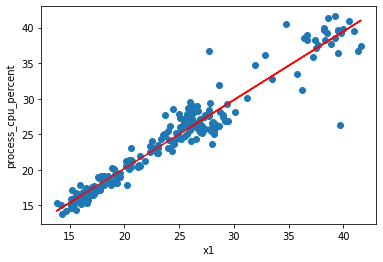

In [1243]:
plt.scatter(x, y)
plt.plot(x, reg.predict(x.reshape(-1, 1)), color='red')
plt.xlabel('x1')
plt.ylabel('process_cpu_percent')

Para visualizar o modelo na forma de uma Série Temporal ciaremos uma nova coluna no _DataFrame_ df chamada ar_1.

In [1244]:
df1['ar_1'] = previsoes

<AxesSubplot:xlabel='time'>

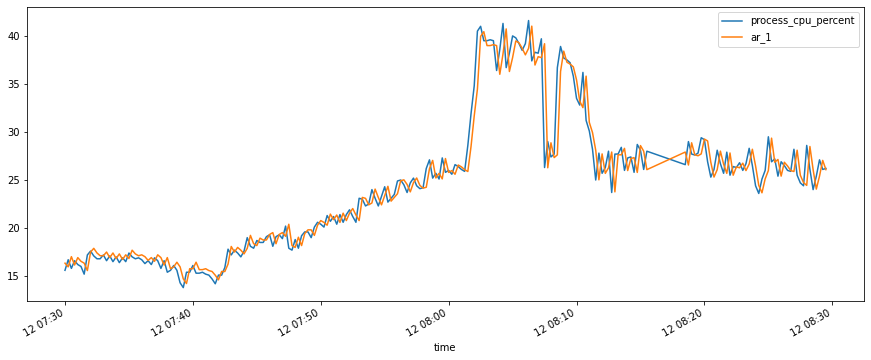

In [1245]:
df1[['process_cpu_percent', 'ar_1']].plot(figsize=(15,6))

Faremos agora a aplicacação do modelo de regressão para AR(2). Para tanto acrescentaremos a coluna denominada _x2_, representando o _lag_ de 2 períodos. Nesse caso, temos um modelo de regressçao linear múltipla com x1 e x2 como variáveis indpendentes e _process_cpu_porcent_ como variável dependente

In [1246]:
df1['x2'] = df.process_cpu_percent.shift(2)
df1.dropna(axis=0, inplace=True)
df1.head()

,process_cpu_percent,x1,ar_1,x2
time,,,,
2022-05-12 07:30:15,16.7,15.6,15.959049,16.0
2022-05-12 07:30:30,15.8,16.7,17.019228,15.6
2022-05-12 07:30:45,16.6,15.8,16.151809,16.7
2022-05-12 07:31:00,16.2,16.6,16.922849,15.8
2022-05-12 07:31:15,16.0,16.2,16.537329,16.6


In [1247]:
x = df1[['x1', 'x2']]
y = df1.process_cpu_percent.values

reg2 = LinearRegression().fit(x ,y)
previsoes = reg2.predict(x)
errors = (y - previsoes) ** 2
errors.mean()

3.2010003344820115

<AxesSubplot:xlabel='time'>

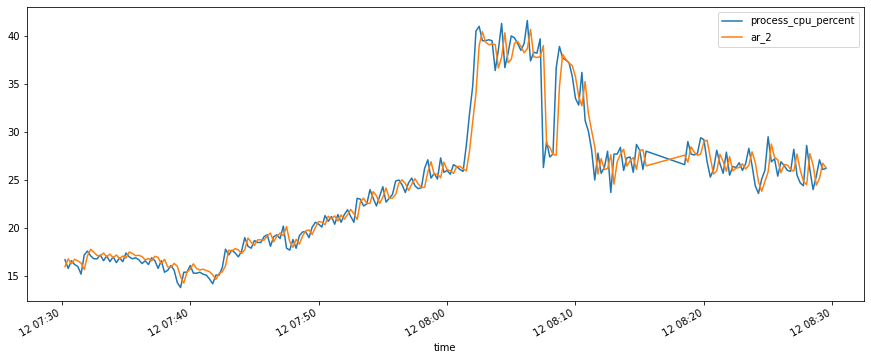

In [1248]:
df1['ar_2'] = reg2.predict(x)
df1[['process_cpu_percent', 'ar_2']].plot(figsize=(15,6))

In [1249]:
df1.head()

,process_cpu_percent,x1,ar_1,x2,ar_2
time,,,,,
2022-05-12 07:30:15,16.7,15.6,15.959049,16.0,15.999873
2022-05-12 07:30:30,15.8,16.7,17.019228,15.6,16.787283
2022-05-12 07:30:45,16.6,15.8,16.151809,16.7,16.286479
2022-05-12 07:31:00,16.2,16.6,16.922849,15.8,16.746076
2022-05-12 07:31:15,16.0,16.2,16.537329,16.6,16.581247


# Utilizando o pacote statsmodels

Para facilitar o uso de modelos AutoRegressivos, utilizaremos o pacote ```statsmodels```. 

Faremos a criação de modelo AR(2) para comparar com o resultado gerado anteriormente. Chamaremos o modelo criado de _ar_2_

In [1250]:
from statsmodels.tsa.ar_model import AutoReg

modelo = AutoReg(df.process_cpu_percent, 2)
ar_2 = modelo.fit()

c:\Users\Pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Utilizando o atributo _resid_, obtemos os erros residuais das previsões de cada período da série. Podemos utilizar essa informação para calcular o erro quadrático do modelo, elevando a _Series_ contendo os erros residuais por 2. 

In [1251]:
(ar_2.resid ** 2).mean()

3.2010003344820124

Para analisar de forma descritiva os erros do modelo, temos a possibilidade de utilizar o comando _Series.describe()_

In [1252]:
ar_2.resid.describe()

count    2.270000e+02
mean    -4.249171e-15
std      1.793088e+00
min     -1.269903e+01
25%     -7.877950e-01
50%     -8.529294e-02
75%      6.586933e-01
max      9.105693e+00
dtype: float64

A análise pode ser finalizada com o uso do histograma dos erros. Para criar o histograma, utilizamos o comando _Series.hist()_

<AxesSubplot:>

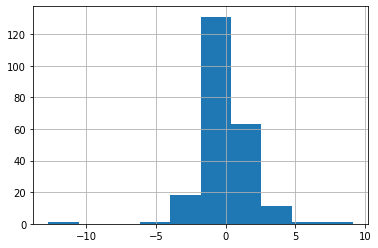

In [1253]:
ar_2.resid.hist()

Para finalizar, analisaremos o modelo AR(3)

In [1254]:
ar_3 = AutoReg(df.process_cpu_percent, 3).fit()

(ar_3.resid ** 2 ).mean()



c:\Users\Pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3.1942724999029326

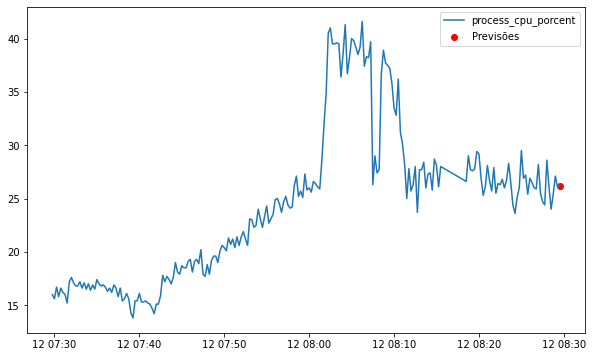

In [1255]:
plt.figure(figsize=(10, 6))
plt.plot(df.process_cpu_percent)
forecast = ar_3.predict(start='2022-05-12 08:29:30', end='2022-05-12 08:29:30')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['process_cpu_porcent', 'Previsões'])